<a href="https://colab.research.google.com/github/somewhereovertherainbo/audio_processing/blob/main/audio_processing_hyperprameter_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
try:
  import pytsmod as tsm
except:
  !pip install pytsmod -q

In [7]:
import numpy as np
import requests
import io
import matplotlib.pylab as plt
import pytsmod as tsm

import librosa
import librosa.display
import IPython.display as ipd

In [9]:
# Read the audio file and get its sample rate and data
input_audio_url = "https://github.com/somewhereovertherainbo/audio_processing/raw/main/audio_files/00_Original.wav"  # Replace with your input audio file

# Download the .wav file
response = requests.get(input_audio_url)
response.raise_for_status()  # Ensure the request was successful

# Read the .wav file into a bytes buffer
wav_file = io.BytesIO(response.content)
data, sr = librosa.load(wav_file)  # read audio data (data), sample rate (sr) from the audio file

In [12]:
print(f'Audio signal looks like: {data[:5]}')
print(f'The length of audio signal is : {len(data)}')
print(f' The sampling rate is : {sr}')

Audio signal looks like: [-0.00025759 -0.0002945  -0.00026843 -0.00031326 -0.00034365]
The length of audio signal is : 1343110
 The sampling rate is : 22050


In [19]:
# Audio sample
ipd.Audio(data, rate = sr)

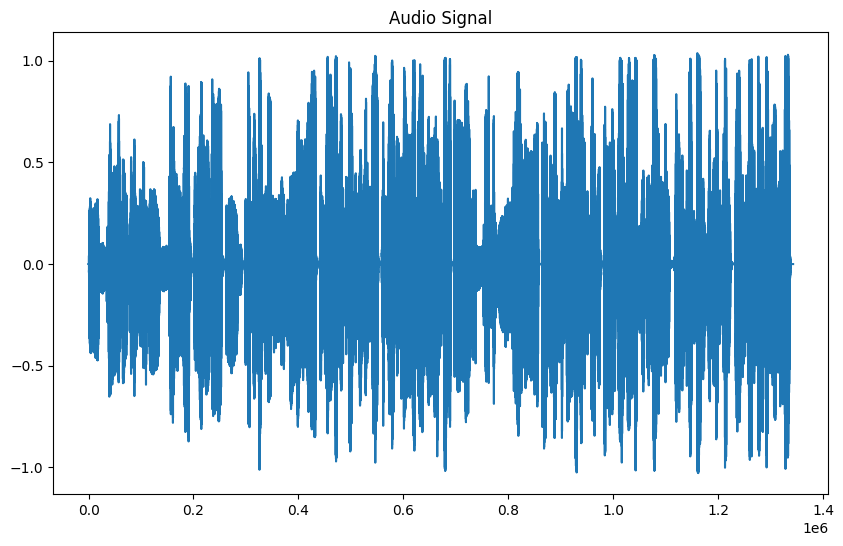

In [20]:
#Visualizing audio signal
plt.figure(figsize=(10,6))
plt.plot(data)
plt.title('Audio Signal')
plt.show()

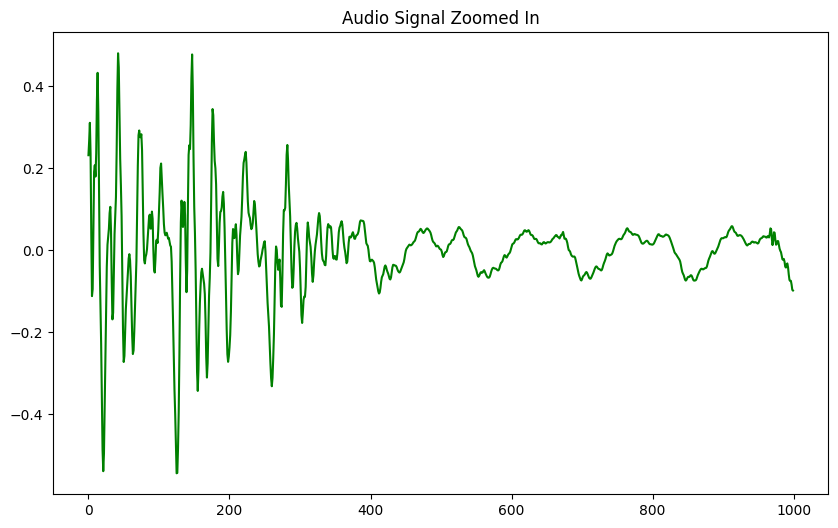

In [24]:
#Visualizing audio signal
plt.figure(figsize=(10,6))
plt.plot(data[49000:50000], color = 'green')
plt.title('Audio Signal Zoomed In')
plt.show()

In [119]:
def calculate_metric(y, sr):

  # A function to calculate a metric that measures the quality of audio file post processing
  S = librosa.feature.melspectrogram(y=y,
                                     sr=sr,
                                     n_mels =  50)
  S_db_mel = librosa.amplitude_to_db(S, ref = np.max)

  # Uncomment to get the plot. Do not use in a loop.
  # fig,ax =plt.subplots(figsize = (10,5))
  # img = librosa.display.specshow(S_db_mel,
  #                               x_axis = 'time',
  #                               y_axis = 'log',
  #                               ax= ax)
  # ax.set_title('Mel Spectrogram of WSOLA data 512')
  # fig.colorbar(img, ax=ax, format = f'%0.2f')
  # plt.show()
  indices = [i for i, x in enumerate(S_db_mel) if 0 > x > -10]
  S_useful = S_db_mel[indices,:]

  spectral_sum = np.average(S_useful, axis = 1)

  return spectral_sum

In [120]:
temp1 = [32,64,128,256,512, 1024]
temp2 = [2,4,8,16,32,64,128,256]

In [121]:
metric = {}
speed_factor = 0.75
s_fixed = float(1/speed_factor)
ss_raw = calculate_metric(data, sr)
for i in temp1:
  for j in temp2:
    x_s = tsm.wsola(data, s_fixed,syn_hop_size = i, tolerance = j)
    ss_ = calculate_metric(x_s, sr)
    metric[i,j] = np.abs(np.average(ss_raw - ss_))

awesome_params = min(metric, key=metric.get)
awesome_params

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

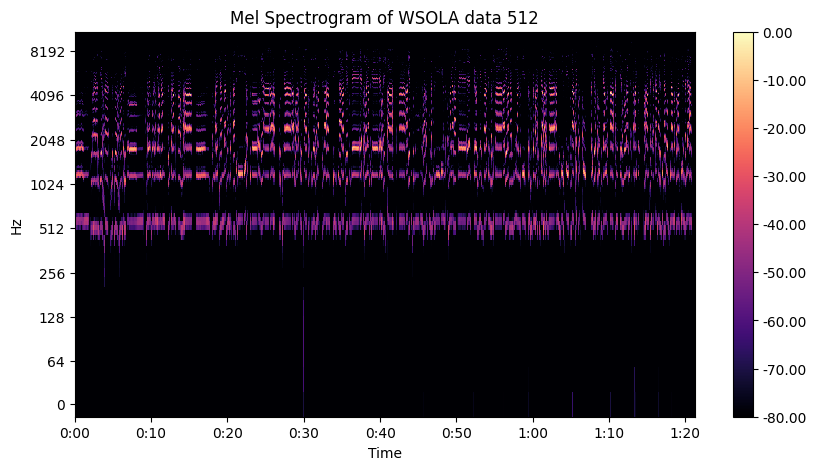

In [102]:
x_s = tsm.wsola(data, s_fixed,syn_hop_size = 512, tolerance = 4)
ss_ = calculate_metric(x_s, sr)
S = librosa.feature.melspectrogram(y=x_s,
                                     sr=sr,
                                     n_mels =  300)
S_ = librosa.amplitude_to_db(S, ref = np.max)

# Uncomment to get the plot. Do not use in a loop.
fig,ax =plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_,
                              x_axis = 'time',
                              y_axis = 'log',
                              ax= ax)
ax.set_title('Mel Spectrogram of WSOLA data 512')
fig.colorbar(img, ax=ax, format = f'%0.2f')
plt.show()

In [103]:
metric

{(32, 2): 9.096348503507775,
 (32, 4): 9.024498042837617,
 (32, 8): 8.632311692753413,
 (32, 16): 6.943227358873331,
 (32, 32): 6.409927394789058,
 (32, 64): 1.3340043460620614,
 (32, 128): 1.0078643498638369,
 (32, 256): 0.9220043961053971,
 (64, 2): 8.776526579256652,
 (64, 4): 8.451100440580863,
 (64, 8): 7.43586229826475,
 (64, 16): 6.518576280167215,
 (64, 32): 5.965941106265609,
 (64, 64): 1.1060543863340593,
 (64, 128): 0.9751218075281831,
 (64, 256): 0.88023613767076,
 (128, 2): 7.306904499717327,
 (128, 4): 7.14408195230286,
 (128, 8): 6.896166653391487,
 (128, 16): 6.039017368758158,
 (128, 32): 5.05179439077708,
 (128, 64): 1.0455990317487656,
 (128, 128): 0.9394401353607281,
 (128, 256): 0.8610575914759623,
 (256, 2): 4.637785647995596,
 (256, 4): 4.33281022534704,
 (256, 8): 4.002081327228035,
 (256, 16): 3.720072522254877,
 (256, 32): 2.675809047035008,
 (256, 64): 0.9356280132069602,
 (256, 128): 0.8911629976350726,
 (256, 256): 0.8833589939691793,
 (510, 2): 0.943341360

In [5]:
speed_factor = 0.75
s_fixed = float(1/speed_factor)
x_s_fixed_ = tsm.wsola(data, s_fixed,syn_hop_size = 256, tolerance = 64)
sf.write('00_wsola_change.wav', x_s_fixed_, samplerate=int(sr))

speed_factor = 0.75
s_fixed = float(1/speed_factor)
x_s_fixed_ = tsm.ola(data, s_fixed,syn_hop_size = 512)
sf.write('00_ola_change_512.wav', x_s_fixed_, samplerate=int(sr))